# Perceptron on toy data

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

## Perceptron algorithm

We use a weight vector $w$ of length $d$ (one for each feature) plus a bias $b$, 
so the predicted class is $sign(w^T x + b)$.
The implementation scales examples to have Euclidean norm 1 (including the "prepended" 1). Bias is explicitely treated for ease of visualization.

In [3]:
def perceptron(X, y, steps=None):
    
    if steps is None:
        steps = X.shape[0]
    else:
        assert steps <= X.shape[0], f'cannot run more steps than size of dataset'
    
    W = np.zeros((2, steps+1))
    B = np.zeros((1, steps+1))

    n_mistakes = 0
    for t, i in enumerate(np.random.permutation(steps)):
        Z = np.sqrt(1 + X[i,0]**2 + X[i,1]**2)
        x = X[i,:] / Z
        x0 = 1 / Z

        pred = np.sign(np.dot(W[:,t], x) + B[:,t]*x0)
        if (pred != y[i]):
            n_mistakes += 1
            if y[i] > 0:  # positive example, sum
                W[:,t+1] = W[:,t] + x
                B[:,t+1] = B[:,t] + x0
            else:         # negative example, subtract
                W[:,t+1] = W[:,t] - x
                B[:,t+1] = B[:,t] - x0
        else:
            W[:,t+1] = W[:,t]
            B[:,t+1] = B[:,t]

    print(f'Perceptron made {n_mistakes} mistakes on {steps} examples')
    return W, B

### Visualize hyperplanes over time

In [4]:
def vis_perceptron(W, B, X, y):
    
    # count how many updates..
    t_updates = []
    for t in range(1, W.shape[1]):
        if not np.array_equal(W[:,t], W[:,t-1]) or not np.array_equal(B[:,t], B[:,t-1]):
            t_updates.append(t)
    
    plt.figure(figsize=(12, (len(t_updates) + 1)*1.4))

    h = .05  # step size in the mesh
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

    #x_min, x_max = -10, + 10
    #y_min, y_max = -10, + 10

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    for i, t in enumerate(t_updates):
        ax = plt.subplot(len(t_updates) // 3 + 1, 3, i+1)

        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

        mesh = np.c_[xx.ravel(), yy.ravel()]
        Z = np.sign(W[:,t] @ mesh.T + B[:,t])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.3)
    
        ax.set_title(f't = {t}')
    
    return

## Now, run perceptron on several datasets and visualize

### 1. Use `iris` dataset to obtain easy linearly separable data

In [5]:
np.random.seed(1)
iris = datasets.load_iris()

y = iris.target
X0 = iris.data[y==0, :2]
X1 = iris.data[y==1, :2]

# select subset of 5 examples of class 0 and class 1
N = 10
X0 = X0[np.random.choice(X0.shape[0], N, replace=False), :]
X1 = X1[np.random.choice(X1.shape[0], N, replace=False), :]

# stack together both classes
X = np.vstack((X0,X1))
y = np.array([1]*N + [-1]*N)

Perceptron made 2 mistakes on 20 examples


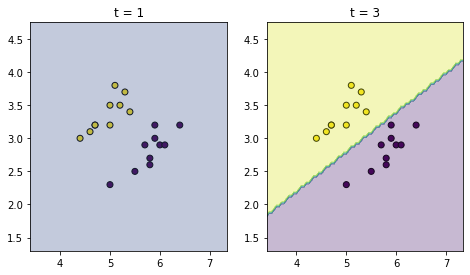

In [6]:
# run perceptron and visualize

W,B = perceptron(X,y)
vis_perceptron(W,B,X,y)

### 2. Use more difficult data

In [47]:
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
y = np.where(y==0, -1, +1)   # map to +1,-1 labels

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

Perceptron made 14 mistakes on 100 examples


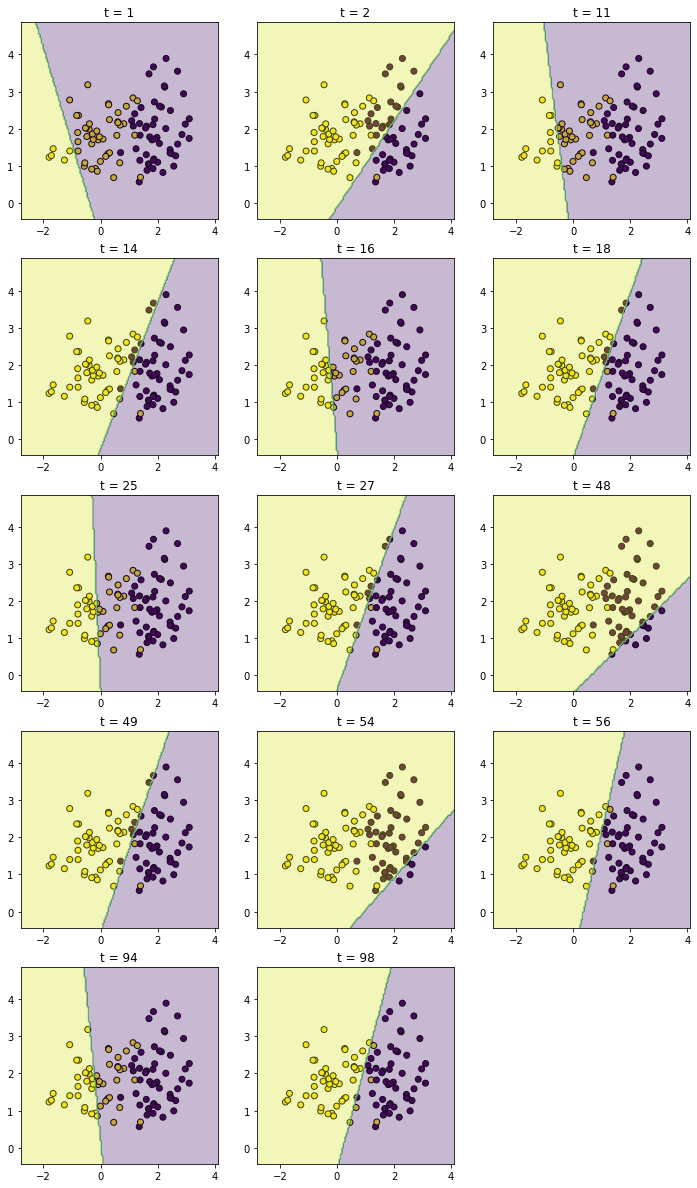

In [48]:
# run perceptron and visualize
W,B = perceptron(X,y)
vis_perceptron(W,B,X,y)